In [168]:
# Importing Libraries

import pandas as pd
import numpy as np

In [169]:
# Loading the datasets

circuits = pd.read_csv('circuits.csv')
lap_times = pd.read_csv('lap_times.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standing = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
seasons = pd.read_csv('seasons.csv')
sprint_results = pd.read_csv('sprint_results.csv')
status = pd.read_csv('status.csv')

In [170]:
# Time conversion function: Converting lap times to milliseconds

def timeconvert(time):
    minutes = int(time[0:1])
    seconds = int(time[2:4])
    milliseconds = minutes*60*1000 + seconds*1000 + int(time[5:])
    return milliseconds

In [171]:
# Storing all the monaco races lap times by year

monaco_IDs = races[races['circuitId'] == 6].sort_values(by='year')['raceId']
monaco_IDs

833      834
792      793
784      785
776      777
765      766
        ... 
961      974
981      994
1002    1015
1041    1056
1063    1080
Name: raceId, Length: 68, dtype: int64

In [172]:
# Sorting the fastest laps according to year and calculating the delta to the 1996 fastest lap

fastestlaps_monaco = pd.DataFrame(columns = ['raceId','year','time','milliseconds','delta'])
for race in monaco_IDs:
    temp = lap_times[lap_times['raceId'] == race]
    if(temp.empty):
        continue
    else:
        temp = temp[temp['milliseconds'] == min(temp['milliseconds'])]
        year = races[races['raceId'] == int(temp['raceId'])]['year']
        delta = temp['milliseconds'] - 85205
        fastestlaps_monaco.loc[len(fastestlaps_monaco)] = [int(temp['raceId']),int(year),str(temp['time'].values),int(temp['milliseconds']),float(delta/1000)]
fastestlaps_monaco

,raceId,year,time,milliseconds,delta
0,229,1996,['1:25.205'],85205,0.000
1,211,1997,['1:53.315'],113315,28.110
2,196,1998,['1:22.948'],82948,-2.257
3,178,1999,['1:22.259'],82259,-2.946
4,164,2000,['1:21.571'],81571,-3.634
5,147,2001,['1:19.424'],79424,-5.781
6,130,2002,['1:18.023'],78023,-7.182
7,114,2003,['1:14.545'],74545,-10.660
8,95,2004,['1:14.439'],74439,-10.766
9,76,2005,['1:15.842'],75842,-9.363


In [173]:
# Storing all the monza lap times by year

monza_IDs = races[races['circuitId'] == 14].sort_values(by='year')['raceId']
monza_IDs

838      839
830      831
823      824
815      816
805      806
        ... 
989     1002
1010    1023
1025    1038
1050    1065
1072    1089
Name: raceId, Length: 72, dtype: int64

In [174]:
# Sorting the fastest laps according to year and calculating the delta to the 1996 fastest lap

fastestlaps_monza = pd.DataFrame(columns = ['raceId','year','time','milliseconds','delta'])
for race in monza_IDs:
    temp = lap_times[lap_times['raceId'] == race]
    if(temp.empty):
        continue
    else:
        temp = temp[temp['milliseconds'] == min(temp['milliseconds'])]
        year = races[races['raceId'] == int(temp['raceId'])]['year']
        delta = temp['milliseconds'] - 86110
        fastestlaps_monza.loc[len(fastestlaps_monza)] = [int(temp['raceId']),int(year),str(temp['time'].values),int(temp['milliseconds']),float(delta/1000)]
fastestlaps_monza

,raceId,year,time,milliseconds,delta
0,237,1996,['1:26.110'],86110,0.000
1,219,1997,['1:24.808'],84808,-1.302
2,204,1998,['1:25.139'],85139,-0.971
3,187,1999,['1:25.579'],85579,-0.531
4,171,2000,['1:25.595'],85595,-0.515
5,155,2001,['1:25.073'],85073,-1.037
6,138,2002,['1:23.657'],83657,-2.453
7,121,2003,['1:21.832'],81832,-4.278
8,104,2004,['1:21.046'],81046,-5.064
9,85,2005,['1:21.504'],81504,-4.606


In [175]:
# Predicting lap times based on previous laps with a window of laps from 5 to 20
# Model: Linear Regression

from sklearn.linear_model import LinearRegression

table_stat = pd.DataFrame(columns = ['w','error'])
w = 5
while(w<=20):
    laps = lap_times[(lap_times['raceId'] == 9) & (lap_times['driverId'] == 1)]
    Ypred = []
    Y = laps.iloc[w:len(laps)]['milliseconds']
    for i in range(w,len(laps)-1):
        X = np.array(laps.iloc[i-w:i]['lap']).reshape(-1, 1)
        Y = np.array(laps.iloc[i-w:i]['milliseconds']).reshape(-1, 1)
        model = LinearRegression()
        model.fit(X,Y)
        lap_pred = model.predict(np.array(laps.loc[i+laps.first_valid_index(),'lap']).reshape(-1,1))
        lap_pred = lap_pred[0][0]
        Ypred.append(lap_pred)
    RMSE = (np.mean(np.sum(Y - Ypred))**2)**1/2
    table_stat.loc[len(table_stat)] = [w,RMSE]
    w = w + 1
table_stat

,w,error
0,5.0,5.009625e+10
1,6.0,3.004907e+10
2,7.0,1.619928e+10
3,8.0,7.279418e+09
4,9.0,2.711811e+09
5,10.0,3.574633e+07
6,11.0,1.492175e+09
7,12.0,8.500492e+09
8,13.0,1.898609e+10
9,14.0,2.511654e+10


In [176]:
# Predicting lap times based on previous laps with a window of laps from 5 to 20
# Model: Polyfit with Log

table_stat = pd.DataFrame(columns = ['w','error'])
w = 5
while(w<=20):
    laps = lap_times[(lap_times['raceId'] == 9) & (lap_times['driverId'] == 1)]
    Ypred = []
    Y = laps.iloc[w:len(laps)]['milliseconds']
    for i in range(w,len(laps)-1):
        X = np.array(laps.iloc[i-w:i]['lap'])
        Y = np.array(laps.iloc[i-w:i]['milliseconds'])
        weights = np.polyfit(np.log(X),np.log(Y),1) 
        model = np.poly1d(weights) 
        lap_pred = model(np.log(np.array(laps.loc[i+laps.first_valid_index(),'lap']).reshape(-1,1)))
        Ypred.append(lap_pred)
    RMSE = (np.mean(np.sum(Y - np.exp(Ypred)))**2)**1/2
    table_stat.loc[len(table_stat)] = [w,RMSE]
    w = w + 1
table_stat

,w,error
0,5.0,2.362635e+10
1,6.0,1.180140e+10
2,7.0,4.423317e+09
3,8.0,5.191255e+08
4,9.0,1.609517e+08
5,10.0,3.678135e+09
6,11.0,1.098927e+10
7,12.0,2.428126e+10
8,13.0,3.879529e+10
9,14.0,4.829143e+10


In [177]:
# Predicting lap times based on previous laps with a window of laps from 5 to 20
# Model: Polyfit with degree 3

table_stat = pd.DataFrame(columns = ['w','error'])
w = 5
while(w<=20):
    laps = lap_times[(lap_times['raceId'] == 9) & (lap_times['driverId'] == 1)]
    Ypred = []
    Y = laps.iloc[w:len(laps)]['milliseconds']
    for i in range(w,len(laps)-1):
        X = np.array(laps.iloc[i-w:i]['lap'])
        Y = np.array(laps.iloc[i-w:i]['milliseconds'])
        weights = np.polyfit(X,Y,3) 
        model = np.poly1d(weights) 
        lap_pred = model(np.array(laps.loc[i+laps.first_valid_index(),'lap']).reshape(-1,1))
        Ypred.append(lap_pred)
    RMSE = (np.mean(np.sum(Y - Ypred))**2)**1/2
    table_stat.loc[len(table_stat)] = [w,RMSE]
    w = w + 1
table_stat

,w,error
0,5.0,1.848022e+10
1,6.0,3.072423e+10
2,7.0,3.373321e+10
3,8.0,3.485064e+10
4,9.0,2.258005e+10
5,10.0,6.050367e+09
6,11.0,9.586970e+07
7,12.0,1.118725e+10
8,13.0,3.489157e+10
9,14.0,3.715026e+10


[72787.57575757647, 85324.3787878793, 107271.93939393881, 107088.99999999983, 100685.45454545443, 96200.04545454515, 94625.59090909075, 100894.36363636366, 98172.09090909096, 97325.4242424241, 96777.92424242407, 95859.4999999998, 94793.69696969692, 96985.63636363661, 98463.01515151511, 99092.27272727281, 97641.68181818252, 96026.57575757569, 97588.56060606072, 97314.96969696973, 95751.575757576, 96450.93939393948, 96429.06060606067, 98309.16666666725, 98418.43939393866, 96141.69696969731, 97998.83333333289, 128364.57575759012, 104094.36363636609, 90754.2878787918, 85677.96969697298, 86344.59090910619, 91242.03030303045, 96757.36363638472, 101854.5151515333, 103777.43939392827, 99379.96969698137, 87970.48484848998, 96412.27272727268, 96393.4090909091, 96751.50000000012, 96743.57575757612, 100502.95454545633, 99274.10606060768, 101083.57575757438, 97907.92424241873, 95982.77272728551]


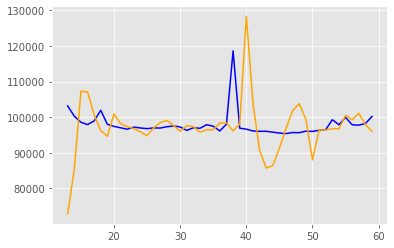

In [178]:
# Plotting Actual to predicted lap times using optimal window of laps and best model
# W = 11 , Model = Polyfit with degree 3

import matplotlib.pyplot as plt

laps = lap_times[(lap_times['raceId'] == 9) & (lap_times['driverId'] == 1)]
Ypred = []
w = 11
Xmain = laps.iloc[w+1:len(laps)]['lap']
Ymain = laps.iloc[w+1:len(laps)]['milliseconds']
for i in range(w,len(laps)-1):
    X = np.array(laps.iloc[i-w:i]['lap'])
    Y = np.array(laps.iloc[i-w:i]['milliseconds'])
    weights = np.polyfit(X,Y,3) 
    model = np.poly1d(weights) 
    lap_pred = float(model(np.array(laps.loc[i+laps.first_valid_index(),'lap']).reshape(-1,1)))
    Ypred.append(lap_pred)
print(Ypred)
plt.plot(Xmain,Ymain,c='blue')
plt.plot(Xmain,Ypred,c='orange')
plt.show()

[82780.66666666669, 93750.73333333334, 98651.53333333333, 99696.4, 99114.93333333333, 98791.79999999999, 98295.79999999999, 99063.8, 100463.6, 99900.46666666666, 98744.33333333334, 97481.53333333333, 96154.93333333333, 96558.66666666667, 96494.53333333334, 96119.86666666667, 95776.06666666665, 95746.53333333333, 96801.40000000001, 97192.86666666667, 97350.46666666667, 97026.73333333332, 96948.13333333332, 96938.13333333333, 97282.13333333335, 97346.93333333332, 96893.66666666666, 97248.66666666667, 105874.0, 104431.6, 102848.93333333332, 100845.73333333334, 99017.59999999999, 97217.53333333333, 95642.20000000001, 93997.20000000001, 92060.06666666668, 90802.33333333331, 95176.4, 95467.13333333332, 95701.40000000001, 95977.13333333333, 96278.73333333332, 97673.79999999999, 98218.8, 99392.26666666666, 99392.8, 99269.06666666667]


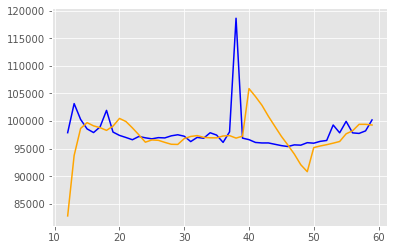

In [179]:
# Plotting Actual to predicted lap times using optimal window of laps and best model
# W = 10 , Model = Linear Regression

import matplotlib.pyplot as plt

laps = lap_times[(lap_times['raceId'] == 9) & (lap_times['driverId'] == 1)]
Ypred = []
w = 10
Xmain = laps.iloc[w+1:len(laps)]['lap']
Ymain = laps.iloc[w+1:len(laps)]['milliseconds']
for i in range(w,len(laps)-1):
    X = np.array(laps.iloc[i-w:i]['lap']).reshape(-1,1)
    Y = np.array(laps.iloc[i-w:i]['milliseconds']).reshape(-1,1)
    model = LinearRegression()
    model.fit(X,Y)
    lap_pred = model.predict(np.array(laps.loc[i+laps.first_valid_index(),'lap']).reshape(-1,1))
    lap_pred = lap_pred[0][0]
    Ypred.append(lap_pred)
print(Ypred)
plt.plot(Xmain,Ymain,c='blue')
plt.plot(Xmain,Ypred,c='orange')
plt.show()

In [180]:
# Splitting the lap times for driver no. 20 and Indian GP into training and test set

driver_Id = 20
circuit_Id = 68
race_Id_2011 = races[(races['year'] == 2011) & (races['circuitId'] == circuit_Id)]['raceId'].values[0]
race_Id_2012 = races[(races['year'] == 2012) & (races['circuitId'] == circuit_Id)]['raceId'].values[0]
Xtrain = np.array(lap_times[(lap_times['raceId'] == race_Id_2011) & (lap_times['driverId'] == driver_Id)]['lap']).reshape(-1,1)
Ytrain = np.array(lap_times[(lap_times['raceId'] == race_Id_2011) & (lap_times['driverId'] == driver_Id)]['milliseconds']).reshape(-1,1)
Xtest = np.array(lap_times[(lap_times['raceId'] == race_Id_2012) & (lap_times['driverId'] == driver_Id)]['lap']).reshape(-1,1)
Ytest = np.array(lap_times[(lap_times['raceId'] == race_Id_2012) & (lap_times['driverId'] == driver_Id)]['milliseconds']).reshape(-1,1)
Xtrain,Ytrain

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49],
        [50],
        [51],
        [52],
        [53],
        [54],
        [55],
        [56],
        [57],
        [58],
        [59],
        [60]]),
 array([[ 94881],
        [ 93738],
        [ 92770],
        [ 92377],
        [ 92703],
        [ 91834],
        [ 91639],
        [ 91308],
        [ 9146

In [181]:
# Predicting lap times using previous years lap times using Lasso Regression

from sklearn.linear_model import Lasso

stat = pd.DataFrame(columns = ['Actual','Predicted'])
model = Lasso(alpha=0.1)
model.fit(Xtrain,Ytrain)
Ypred = (model.predict(Xtest)).reshape(len(Ytest),1)
for i in range(0,len(Ytest)):
    stat.loc[i,'Actual'] = Ytest[i]
    stat.loc[i,'Predicted'] = Ypred[i]
stat

,Actual,Predicted
0,[93554],[92748.81092896176]
1,[92624],[92675.40603871446]
2,[92577],[92602.00114846717]
3,[92417],[92528.59625821988]
4,[92265],[92455.19136797258]
5,[92481],[92381.7864777253]
6,[92053],[92308.38158747801]
7,[92189],[92234.97669723071]
8,[92122],[92161.57180698343]
9,[92042],[92088.16691673614]


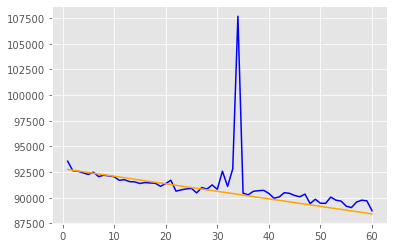

In [182]:
# Plotting actual to predicted lap times

plt.plot(Xtest,Ytest,c='blue')
plt.plot(Xtest,Ypred,c='orange')
plt.show()

In [183]:
avg_delta = np.mean(Ypred - Ytest)/1000
avg_delta

-0.5956999999999961

In [184]:
# Constructor/Team comparison based on fastest lap times of the season

driver_Ids = [844,1,846,4,842,20,822,825,848]
constructor_names = ['Ferrari','Mercedes','Mclaren','Alpine','Alpha Tauri','Aston Martin','Alfa Romeo','Haas','Williams']
race_Id = 1082
table_stat = pd.DataFrame(columns = ['Constructor','delta'])
benchmark = lap_times[(lap_times['driverId'] == 830) & (lap_times['raceId'] == race_Id)]
benchmark_lap = benchmark[benchmark['milliseconds'] == min(benchmark['milliseconds'])]['milliseconds'].values[0]
delta = (benchmark_lap - benchmark_lap)/1000
table_stat.loc[len(table_stat)] = ['Red Bull',delta]
for i in range(0,len(driver_Ids)):
    temp = lap_times[(lap_times['driverId'] == driver_Ids[i]) & (lap_times['raceId'] == race_Id)]
    temp_lap = temp[temp['milliseconds'] == min(temp['milliseconds'])]['milliseconds'].values[0]
    delta = (temp_lap - benchmark_lap)/1000
    table_stat.loc[len(table_stat)] = [constructor_names[i],delta]
table_stat

,Constructor,delta
0,Red Bull,0.000
1,Ferrari,0.062
2,Mercedes,0.328
3,Mclaren,1.656
4,Alpine,1.171
5,Alpha Tauri,1.971
6,Aston Martin,2.117
7,Alfa Romeo,1.088
8,Haas,2.207
9,Williams,2.112


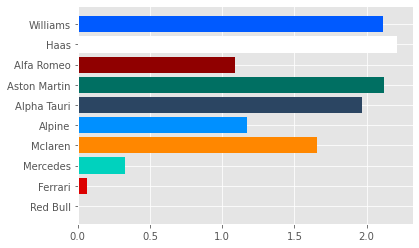

In [185]:
# Plotting Constructor/Team performance relative to the fastest team (Red Bull) 

import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.barh(table_stat['Constructor'],table_stat['delta'],color = ['#0600EF','#DC0000','#00D2BE','#FF8700','#0090FF','#2B4562','#006F62','#900000','#FFFFFF','#005AFF'])
plt.show()

In [186]:
# Driver comparison based on fastest lap times of the season

race_Id = [1081,1082,1084,1086]
year = 2022
driver_Ids = [830,815,844,832,1,847,846,817,4,839,842,852,20,840,822,855,825,854,848,849]
driver_names = []
lap_stat = pd.DataFrame(columns = ['raceId','driver_Id','drivername','milliseconds'])
pace_stat = pd.DataFrame(columns = ['drivername','delta'])
for i in driver_Ids:
    driver_names.append(drivers[drivers['driverId'] == i]['driverRef'].values[0])
for race in range(0,len(race_Id)):
    for driver in range(0,len(driver_Ids)):
        temp = lap_times[(lap_times['driverId'] == driver_Ids[driver]) & (lap_times['raceId'] == race_Id[race])]
        temp_lap = temp[temp['milliseconds'] == min(temp['milliseconds'])]['milliseconds'].values[0]
        lap_stat.loc[len(lap_stat)] = [race_Id[race],driver_Ids[driver],driver_names[driver],temp_lap]
for driver in range(0,len(driver_Ids)):
    avg_lap = np.mean(lap_stat[lap_stat['driver_Id'] == driver_Ids[driver]]['milliseconds'].values[0])
    pace_stat.loc[len(pace_stat)] = [driver_names[driver],avg_lap]
pace_stat['delta'] = (pace_stat['delta'] - min(pace_stat['delta']))/1000
pace_stat

,drivername,delta
0,max_verstappen,0.004
1,perez,0.000
2,leclerc,1.485
3,sainz,2.932
4,hamilton,0.998
5,russell,1.131
6,norris,1.951
7,ricciardo,2.230
8,alonso,1.943
9,ocon,2.251


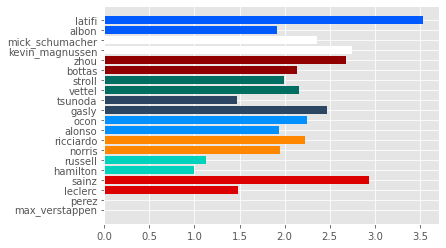

In [187]:
# Plotting Driver performance relative to the fastest Driver (Sergio Perez) 

import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.barh(pace_stat['drivername'],pace_stat['delta'],color = ['#0600EF','#0600EF','#DC0000','#DC0000','#00D2BE','#00D2BE','#FF8700','#FF8700','#0090FF','#0090FF','#2B4562','#2B4562','#006F62','#006F62','#900000','#900000','#FFFFFF','#FFFFFF','#005AFF','#005AFF'])
plt.show()

In [188]:
# Fastest Tracks based on lap time for the 2018 season

races_2018 = races[races['year'] == 2018]['raceId']
track = pd.DataFrame(columns = ['Track','Lap-Time','milliseconds'])
for race in races_2018:
    laps = lap_times[(lap_times['driverId'] == 830) & (lap_times['raceId'] == race)]['milliseconds']
    fastest_lap = min(laps)
    lap_time = lap_times[(lap_times['driverId'] == 830) & (lap_times['raceId'] == race) & (lap_times['milliseconds'] == fastest_lap)]['time']
    track.loc[len(track)] = [races[races['raceId'] == race]['name'].values[0],lap_time.values[0],fastest_lap]
track = track.sort_values(by = 'milliseconds')
track

,Track,Lap-Time,milliseconds
8,Austrian Grand Prix,1:07.442,67442
19,Brazilian Grand Prix,1:11.578,71578
6,Canadian Grand Prix,1:13.864,73864
5,Monaco Grand Prix,1:14.260,74260
10,German Grand Prix,1:15.852,75852
18,Mexican Grand Prix,1:19.186,79186
4,Spanish Grand Prix,1:19.422,79422
13,Italian Grand Prix,1:23.609,83609
11,Hungarian Grand Prix,1:23.985,83985
0,Australian Grand Prix,1:26.880,86880


In [189]:
# Calculating Driver error percentage based on accidents and collisions for the 2022 season

error_stat = pd.DataFrame(columns=['drivername','Error-Prone Percentage'])
for driver in range(0,len(driver_Ids)):
    temp = results[results['driverId'] == driver_Ids[driver]]
    race_count = len(temp)
    temp = temp[(temp['statusId'] == 3) | (temp['statusId'] == 4)]
    incident_count = len(temp)
    error_stat.loc[len(error_stat)] = [driver_names[driver],(incident_count/race_count)*100]
error_stat

,drivername,Error-Prone Percentage
0,max_verstappen,6.493506
1,perez,4.385965
2,leclerc,9.574468
3,sainz,4.545455
4,hamilton,3.986711
5,russell,8.219178
6,norris,5.479452
7,ricciardo,2.690583
8,alonso,3.724928
9,ocon,4.901961


In [190]:
# Calculating overtakes per race for the 2022 season

race_Id = [1081,1082,1084,1086]
overtake_stat = pd.DataFrame(columns = ['drivername','overtakes/race'])
for driver in range(0,len(driver_Ids)):
    total_overtakes = 0
    for race in race_Id:
        temp = lap_times[(lap_times['driverId'] == driver_Ids[driver]) & (lap_times['raceId'] == race)]
        grid = temp['position'].head(1).values[0]
        position = temp['position'].tail(1).values[0]
        overtakes = position - grid
        if(overtakes<0):
            overtakes = 0
        total_overtakes = total_overtakes + overtakes
    overtake_stat.loc[len(overtake_stat)] = [driver_names[driver],total_overtakes/len(race_Id)]
overtake_stat

,drivername,overtakes/race
0,max_verstappen,0.25
1,perez,0.25
2,leclerc,4.50
3,sainz,0.50
4,hamilton,0.00
5,russell,0.50
6,norris,1.00
7,ricciardo,1.00
8,alonso,1.50
9,ocon,0.75


In [191]:
# Merging the tables for calculating driver ratings

driver_stat = pd.merge(pace_stat,error_stat,on='drivername')
driver_stat = pd.merge(driver_stat,overtake_stat,on='drivername')
driver_stat['team_color'] = ['#0600EF','#0600EF','#DC0000','#DC0000','#00D2BE','#00D2BE','#FF8700','#FF8700','#0090FF','#0090FF','#2B4562','#2B4562','#006F62','#006F62','#900000','#900000','#FFFFFF','#FFFFFF','#005AFF','#005AFF']
driver_stat

,drivername,delta,Error-Prone Percentage,overtakes/race,team_color
0,max_verstappen,0.004,6.493506,0.25,#0600EF
1,perez,0.000,4.385965,0.25,#0600EF
2,leclerc,1.485,9.574468,4.50,#DC0000
3,sainz,2.932,4.545455,0.50,#DC0000
4,hamilton,0.998,3.986711,0.00,#00D2BE
5,russell,1.131,8.219178,0.50,#00D2BE
6,norris,1.951,5.479452,1.00,#FF8700
7,ricciardo,2.230,2.690583,1.00,#FF8700
8,alonso,1.943,3.724928,1.50,#0090FF
9,ocon,2.251,4.901961,0.75,#0090FF


In [192]:
# Ranking each driver based on Error percentage, Delta and overtakes

driver_stat = driver_stat.sort_values(by='delta')
delta_rank = []
error_rank = []
overtake_rank = []
for i in range(1,21):
    delta_rank.append(i)
    error_rank.append(i)
    overtake_rank.append(i)
driver_stat['delta_rank'] = delta_rank
driver_stat = driver_stat.sort_values(by='Error-Prone Percentage')
driver_stat['error_rank'] = error_rank
driver_stat = driver_stat.sort_values(by='overtakes/race',ascending=False)
driver_stat['overtake_rank'] = overtake_rank
driver_stat = driver_stat.sort_values(by='delta')
driver_stat


,drivername,delta,Error-Prone Percentage,overtakes/race,team_color,delta_rank,error_rank,overtake_rank
1,perez,0.000,4.385965,0.25,#0600EF,1,7,17
0,max_verstappen,0.004,6.493506,0.25,#0600EF,2,14,16
4,hamilton,0.998,3.986711,0.00,#00D2BE,3,6,20
5,russell,1.131,8.219178,0.50,#00D2BE,4,17,15
11,tsunoda,1.477,5.714286,2.25,#2B4562,5,13,3
2,leclerc,1.485,9.574468,4.50,#DC0000,6,19,2
18,albon,1.920,1.960784,0.75,#005AFF,7,1,9
8,alonso,1.943,3.724928,1.50,#0090FF,8,4,4
6,norris,1.951,5.479452,1.00,#FF8700,9,11,5
13,stroll,1.992,7.079646,0.50,#006F62,10,15,13


In [193]:
# Calculating the driver ratings based on the ranks calculated earlier
# Driver rating = ((((20-delta_rank)/20) + ((20-error_rank)/20) + ((20-overtake_rank)/20))/3

driver_stat['driver_rating'] = ((((20-driver_stat['delta_rank'])/20) + ((20-driver_stat['error_rank'])/20) + ((20-driver_stat['overtake_rank'])/20))/3)*100
driver_stat

,drivername,delta,Error-Prone Percentage,overtakes/race,team_color,delta_rank,error_rank,overtake_rank,driver_rating
1,perez,0.000,4.385965,0.25,#0600EF,1,7,17,58.333333
0,max_verstappen,0.004,6.493506,0.25,#0600EF,2,14,16,46.666667
4,hamilton,0.998,3.986711,0.00,#00D2BE,3,6,20,51.666667
5,russell,1.131,8.219178,0.50,#00D2BE,4,17,15,40.000000
11,tsunoda,1.477,5.714286,2.25,#2B4562,5,13,3,65.000000
2,leclerc,1.485,9.574468,4.50,#DC0000,6,19,2,55.000000
18,albon,1.920,1.960784,0.75,#005AFF,7,1,9,71.666667
8,alonso,1.943,3.724928,1.50,#0090FF,8,4,4,73.333333
6,norris,1.951,5.479452,1.00,#FF8700,9,11,5,58.333333
13,stroll,1.992,7.079646,0.50,#006F62,10,15,13,36.666667


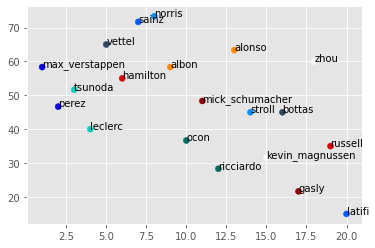

In [194]:
# Plotting driver ranks

x = driver_stat['delta_rank']
y = driver_stat['driver_rating']
z = driver_stat['team_color']
for i, driver in enumerate(driver_stat['drivername']):
    plt.annotate(driver, (x[i], y[i]))
plt.scatter(x,y,c=z)
plt.show()